In [1]:
!pip install matplotlib

In [7]:
import seaborn as sns
import pandas as pd 
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [14]:
df_2class = pd.read_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')
df_2class

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,922.417000,6.3511,8.0,9.0,4.000000
1,2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,594.045000,6.1297,4.0,6.0,4.000000
2,4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,inactive,822.300000,4.7851,8.0,8.0,4.000000
3,5,CHEMBL421541,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,864.421000,9.6791,6.0,7.0,4.000000
4,6,CHEMBL313345,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,675.207000,6.8138,5.0,6.0,4.000000
...,...,...,...,...,...,...,...,...,...
398,650,CHEMBL3948172,CC1CCCC2(OC(O)C=CC2=O)O1,active,198.218000,0.7456,1.0,4.0,7.899629
399,652,CHEMBL4076246,C/C(=C\C(=O)Nc1cc([123I])ccc1C(=O)O)c1ccc2cccc...,inactive,453.268589,5.1846,2.0,2.0,4.551603
400,653,CHEMBL4081286,O=c1cc(-c2cc(O)c(O)cc2[123I])oc2c(O)c(O)ccc12,active,408.136589,2.8870,4.0,6.0,6.013721
401,654,CHEMBL4062047,C/C(=C\C(=O)Nc1ccc([123I])cc1C(=O)O)c1ccc2cccc...,inactive,453.268589,5.1846,2.0,2.0,4.521578


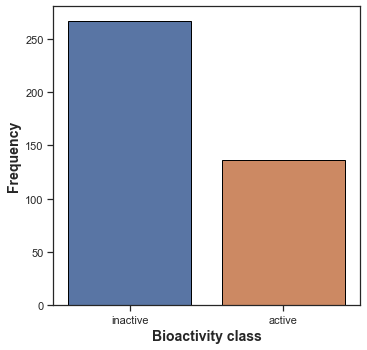

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

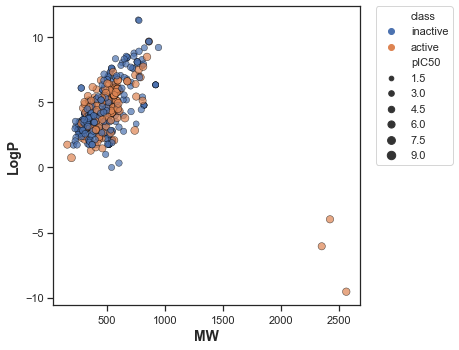

In [16]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')


# Box plots
## pIC50 value


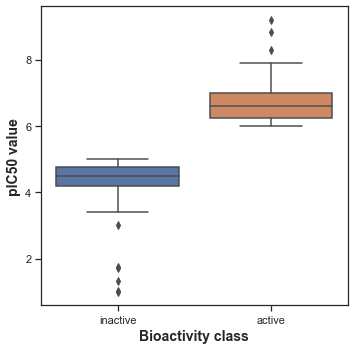

In [17]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

## Statistical analysis | Mann-Whitney U Test



In [20]:
def mannwhitney(descriptor, verbose=False):
    # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    # seed the random number generator
    seed(1)

    # actives and inactives
    selection = [descriptor, 'class']
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

In [21]:
mannwhitney('pIC50')


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,6.091921e-61,0.05,Different distribution (reject H0)


# MW

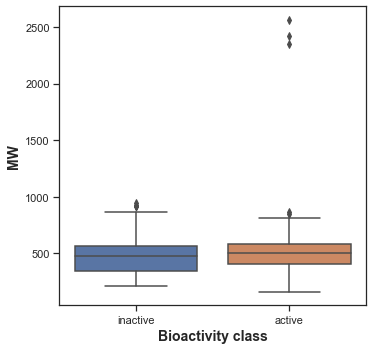

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [23]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,15817.5,0.017233,0.05,Different distribution (reject H0)


# LogP

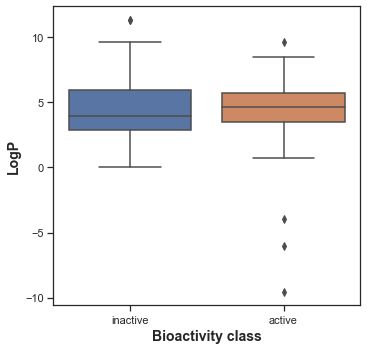

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [25]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,16188.5,0.037618,0.05,Different distribution (reject H0)


 # NumHDonors


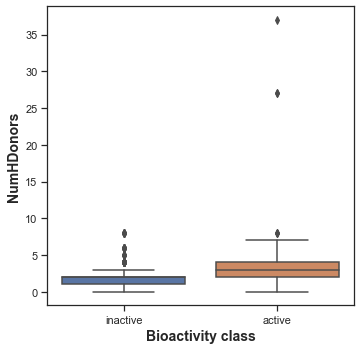

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [27]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,11931.0,4.378253e-09,0.05,Different distribution (reject H0)


# NumHAcceptors


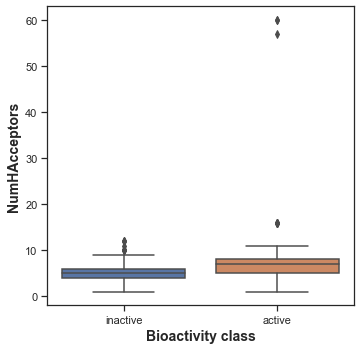

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [29]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,13014.0,0.000001,0.05,Different distribution (reject H0)


# Interpretation of Statistical Results
## Box Plots
## pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

### Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [30]:
! zip -r results.zip . -i *.csv *.pdf

'zip' is not recognized as an internal or external command,
operable program or batch file.
